In [1]:
# Standard library imports
import sys
import os
import time
#import pickle
#import pathlib
from typing import Optional, Tuple, Union
from copy import deepcopy
import glob
import traceback

# Third party imports
import yaml
import numpy as np
import matplotlib.pyplot as plt
#import subprocess
import torch.cuda as cuda
import torch as t
from torch import load, save
from sklearn import linear_model

# own scripts
from wasabi.data import Data
from wasabi.trainer import Trainer
from wasabi.auxiliary_functions import load_config, save_config, load_config_from_model
from wasabi.loss import GNLL
from wasabi.eval_wasabi import EvalWasabi
%config Completer.use_jedi = False

In [2]:
# number of trainingsepochs
n_epochs = 1
config = {}

# fill config

In [3]:
config['OUTPUT_DIR'] = 'output/tests'
config['VAL_FREQ'] = 1
config['AUTOSAVE_FREQ'] = 1
config['FORCE_CPUGPU'] = 'cpu'
config['ABORT_ON_OVERFIT'] = False
config['ABORT_AFTER_N_OVERFIT_EPOCHS'] = 5
config['ABORT_ON_SLOW_TRAIN'] = 0.1
config['ABORT_ON_TIME'] = 3600
config['ABORT_ON_LOSS'] = -11.
config['DATA_X_PATH'] = 'data/testdata/testdata_X_train.pt'
config['DATA_Y_PATH'] = 'data/testdata/testdata_y_train.pt'
config['OPTIMIZER'] = 'Adam'
config['LOSS_FKT'] = 'GNLL'
config['BATCH_SIZE'] = 128
config['DATA_SPLIT'] = 0.1
config['TYPE_PARAMS'] = ['dB0','B1','T1','T2']
config['NORM_TGTS'] = {'dB0': [-0.5, 0.5], 'B1': [0.5, 1.5], 'T1': [0., 4.], 'T2': [0., 2.]}
config['NET'] = 'CUSTOM'
config['LAYERS'] = ['linear', 'elu', 'linear', 'elu', 'linear']
config['N_NEURONS'] = [31, 100, 100, 8]
config['LAYER_KWARGS'] = {0: {'bias': True}, 2: {'bias': True}, 4: {'bias': True}}
config['NOISE'] = 'gamma_std'
config['CONFIG_NAME'] = 'test_config'
config

{'OUTPUT_DIR': 'output/tests',
 'VAL_FREQ': 1,
 'AUTOSAVE_FREQ': 1,
 'FORCE_CPUGPU': 'cpu',
 'ABORT_ON_OVERFIT': False,
 'ABORT_AFTER_N_OVERFIT_EPOCHS': 5,
 'ABORT_ON_SLOW_TRAIN': 0.1,
 'ABORT_ON_TIME': 3600,
 'ABORT_ON_LOSS': -11.0,
 'DATA_X_PATH': 'data/testdata/testdata_X_train.pt',
 'DATA_Y_PATH': 'data/testdata/testdata_y_train.pt',
 'OPTIMIZER': 'Adam',
 'LOSS_FKT': 'GNLL',
 'BATCH_SIZE': 128,
 'DATA_SPLIT': 0.1,
 'TYPE_PARAMS': ['dB0', 'B1', 'T1', 'T2'],
 'NORM_TGTS': {'dB0': [-0.5, 0.5],
  'B1': [0.5, 1.5],
  'T1': [0.0, 4.0],
  'T2': [0.0, 2.0]},
 'NET': 'CUSTOM',
 'LAYERS': ['linear', 'elu', 'linear', 'elu', 'linear'],
 'N_NEURONS': [31, 100, 100, 8],
 'LAYER_KWARGS': {0: {'bias': True}, 2: {'bias': True}, 4: {'bias': True}},
 'NOISE': 'gamma_std',
 'CONFIG_NAME': 'test_config'}

# check if training runs through

In [4]:
try:
    config_tmp = deepcopy(config)
    data = Data()
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data)
    trainer.train(2)
    
    del data, trainer
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

100%|##| 2/2 [00:05<00:00,  2.99s/it, sum loss=1.62, val sum loss=1.46, epoch=2]

 GOOD 


# check if training with MSELoss runs through

In [5]:
try:
    config_tmp = deepcopy(config)
    config_tmp['LOSS_FKT'] = 'MSELoss'
    config_tmp['N_NEURONS'][-1] = 4
    data = Data()
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data)
    trainer.train(2)
    
    del data, trainer, config_tmp
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

100%|#################| 10/10 [00:02<00:00,  3.80it/s, adding noise =gamma type]
100%|#| 2/2 [00:06<00:00,  3.25s/it, sum loss=0.843, val sum loss=0.756, epoch=2

 GOOD 


# check if training with MSELoss with kwargs runs through

In [6]:
try:
    config_tmp = deepcopy(config)
    config_tmp['LOSS_FKT'] = {'FCT': 'MSELoss', 'kwargs': {'reduction': 'sum'}}
    config_tmp['N_NEURONS'][-1] = 4
    data = Data()
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data)
    trainer.train(2)
    
    del data, trainer, config_tmp
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

100%|#################| 10/10 [00:02<00:00,  3.57it/s, adding noise =gamma type]
100%|#| 2/2 [00:07<00:00,  3.52s/it, sum loss=0.852, val sum loss=0.784, epoch=2

 GOOD 


# test load_config()

In [7]:
try:
    # check for correct name loading
    tmp_config = load_config('doc/net_config_explanation.yaml')
    assert tmp_config['CONFIG_NAME'] == 'config123'
    
    # check for correct generation from filename
    tmp_config = load_config('output/tests/tes.t_c.onfig.yaml')
    assert tmp_config['CONFIG_NAME']=='tes.t_c.onfig'
    
    del tmp_config
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

 GOOD 


# test data._set_config()

In [8]:
try:
    # check if config is set correctly given a dict
    data = Data()
    data._set_config(deepcopy(config))
    assert data.config == config

    # check if config is set correctly given a model path
    data = Data()
    data._set_config('output/tests/test_config_best_model_save.pt')
    config_tmp = load_config_from_model('output/tests/test_config_best_model_save.pt')
    assert data.config == config_tmp

    # check if config is set correctly given a config path
    data = Data()
    data._set_config('output/tests/tes.t_c.onfig.yaml')
    config_tmp = load_config('output/tests/tes.t_c.onfig.yaml')
    assert data.config == config_tmp
    
    try:
        data = Data()
        data._set_config('output/tests/tes.t_c.onfig.yam')
    except ValueError:
        # all is well
        pass

    try:
        data = Data()
        data._set_config(3)
    except TypeError:
        # all is well
        pass

    
    del data
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

 GOOD 


# test rng

In [9]:
try:
    tmp_config = deepcopy(config)
    del tmp_config['NOISE']

    # without noise
    data = Data()
    data.load_data_tensor(tmp_config, printing=False)
    x1_shape, y1_shape = data.raw_data[0].shape, data.raw_data[1].shape
    raw1 = data.raw_data[0]
    std1x = data.raw_data[0].std()
    std1y = data.raw_data[1].std()

    # with noise
    tmp_config = deepcopy(config)
    data = Data()
    data.load_data_tensor(tmp_config, printing=False)
    x2_shape, y2_shape = data.raw_data[0].shape, data.raw_data[1].shape
    raw2 = data.raw_data[0]
    std2x = data.raw_data[0].std()
    std2y = data.raw_data[1].std()

    # compare
    assert raw1[0,0] != raw2[0,0]  # check if noise is set
    assert data.raw_data[0].min() > 0  # check if abs() is taken correctly after noise
    assert x1_shape[0]*10 == x2_shape[0]  # check length
    assert y1_shape[0]*10 == y2_shape[0]  # check length
    assert std2y*0.9999 <= std1y <= std2y*1.0001  # arbitrary, set from a few examples, not future proved
    assert std2x*0.999 <= std1x <= std2x*1.001  # arbitrary, set from a few examples, not future proved
    assert (raw1-raw2[:len(raw1)]).std() < 0.013  # abitrary, set from a few examples, not future proved
    
    del data, raw1, raw2, std1x, std1y, std2x, std2y, x2_shape, y2_shape, x1_shape, y1_shape
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")
    

100%|#################| 10/10 [00:02<00:00,  3.39it/s, adding noise =gamma type]

 GOOD 


# test phantom loading

In [10]:
try:
    tmp_config = deepcopy(config)

    data = Data()
    data.load_phantom('data/test_phantom_wasabi_2020-11-23.p', tmp_config)
    tmp = next(iter(data.test_loader))
    
    assert tmp[0].shape[1] == 31  # check corret data dimension
    assert tmp[1].shape[1] == 4  # check corret data dimension
    
    del tmp, data
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")    

 GOOD 


# test abort conditions

In [11]:
# time
try:
    tmp_config = deepcopy(config)
    tmp_config['ABORT_ON_TIME'] = 2
    data = Data()
    data.load_data_tensor(tmp_config, printing=False)
    trainer = Trainer(data)

    tmp_time = time.time()
    trainer.train(10)
    tmp_time = time.time() - tmp_time

    assert tmp_time<6 # check if time trained is roughly correct
    
    del tmp_time, data
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

  0%|         | 0/10 [00:03<?, ?it/s, sum loss=2.87, val sum loss=1.82, epoch=1]

Required time of 0.0006 h was reached (trained 0.0011 h), training was stopped.
 GOOD 


In [12]:
# loss
try:
    tmp_config = deepcopy(config)
    tmp_config['ABORT_ON_LOSS'] = 2.
    data = Data()
    data.load_data_tensor(tmp_config, printing=False)
    trainer = Trainer(data)
    trainer.train(10)
    
    del tmp_config, data
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m") 

 10%|1| 1/10 [00:07<01:06,  7.42s/it, sum loss=1.61, val sum loss=1.46, epoch=2]

Required loss (2.00000) was reached (1.60627), training was stopped.
 GOOD 


# test eval_wasabi

100%|#########################################| 126/126 [00:01<00:00, 64.87it/s]


INFO: dB0 error should not exceed 0.05 ppm
mean abs. dB0 error (goal <0.008) = 0.0902 ppm
max abs. dB0 error (goal <2.881) = 0.2785 ppm
mean rel. dB0 error = 120.9689 %
 
INFO: abs B1 error should not exceed 0.1 µT
mean abs. B1 error (goal <0.124) = 0.6868 µT
max abs. B1 error (goal <4.774) = 1.3680 µT
mean rel. B1 error = 17.2046 %
 
INFO: abs T1 error should not exceed 50 ms
mean abs. T1 error = 236.5 ms
max abs. T1 error = 1484.4 ms
mean rel. T1 error = 14.414 %
 
INFO: abs T2 error should not exceed ? ms
mean abs. T2 error = 1226.1 ms
max abs. T2 error = 1323.9 ms
mean rel. T2 error = 1442.496 %
 


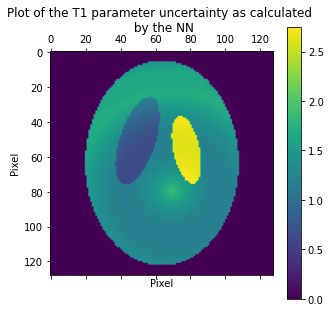

 GOOD 


In [13]:
# test general function
try:
    evalwasabi = EvalWasabi('output/tests/test_config_model_autosave.pt', 
                        data_type='phantom', 
                        phantom_filepath='data/test_phantom_wasabi_2020-11-23.p', 
                        create_zeros_tgts=True)
    evalwasabi.predict()
    evalwasabi.parameter_min_max_check()
    
    evalwasabi.plot_parameter()
    
    del evalwasabi
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m") 

# test R<sup>2</sup>

100%|########################################| 320/320 [00:02<00:00, 130.59it/s]


 GOOD 


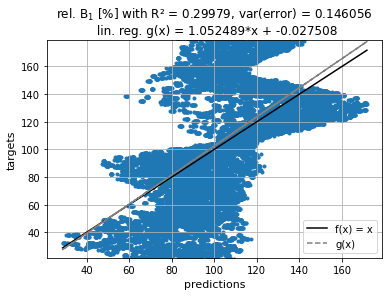

In [14]:
try:
    eval_r2 = EvalWasabi(trainer='output/tests/test_config_comp_best_model_save.pt',
                        data_type='BMCTool',
                        net_to_load='output/tests/test_config_comp_best_model_save.pt')
    eval_r2.predict()

    eval_r2.plot_lin_reg('B1')

    assert isinstance(eval_r2.r2(param='dB0'), float)
    assert isinstance(eval_r2.r2(param='B1'), float)
    assert isinstance(eval_r2.r2(param='T1'), float)
    assert isinstance(eval_r2.r2(param='T2'), float)
    assert isinstance(eval_r2.r2(param='b0_shift'), float)
    assert isinstance(eval_r2.r2(param='b1_inhom'), float)
    assert isinstance(eval_r2.r2(param='t1'), float)
    assert isinstance(eval_r2.r2(param='t2'), float)
    try:
        eval_r2.r2(param='other')
    except ValueError:
        pass
    
    del eval_r2
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m") 

# comparative training

In [15]:
# try:
#     # load and make the config
#     config_tmp = load_config_from_model('output/tests/test_config_05_epochs.pt')
#     config_tmp['CONFIG_NAME'] = 'test_config_comp'
#     config_tmp['TYPE_PARAMS'] = ['dB0','B1','T1','T2']
#     config_tmp['N_NEURONS'] = [31, 100, 100, 8]
# 
#     # load data
#     data_ref = Data()
#     data_ref.load_data_tensor(config_tmp, printing=False)
#     trainer_ref = Trainer(data_ref)
# 
#     # train
#     trainer_ref.train(1)
#     
#     # set compare values
#     test = len(trainer_ref.test_loader)
#     val = len(trainer_ref.val_loader)
#     train = len(trainer_ref.train_loader)
# 
#     evalwasabi_ref = EvalWasabi(trainer_ref, data_type='BMCTool', 
#                                 x_file='data/testdata/testdata_X_train.pt',
#                                 y_file='data/testdata/testdata_y_train.pt',
#                                 evaluation=False)
#     
#     # train
#     evalwasabi_ref.trainer[0].train(1)
#     
#     
#     # compare loader len to previous loader
#     assert (len(trainer_ref.test_loader) != test)
#     assert (len(trainer_ref.val_loader) != val)
#     assert (len(trainer_ref.train_loader) != train)
#     
#     # compare loader in eval_wasabi with loader in trainer 
#     assert len(trainer_ref.test_loader) == len(evalwasabi_ref.trainer.test_loader)
#     assert len(trainer_ref.val_loader) == len(evalwasabi_ref.trainer.val_loader) 
#     assert len(trainer_ref.train_loader) == len(evalwasabi_ref.trainer.train_loader) 
# 
#     del evalwasabi_ref, trainer_ref, data_ref, config_tmp
#     
#     print("\033[0;30;42m GOOD \033[0m")
# except:
#     traceback.print_exc()
#     print("\033[0;30;41m ERROR \033[0m") 

# test tensorboard functionality

In [16]:
try:
    # to access tensorboard on the computer open:
    # tensorboard --logdir='path to the repository or even the tests directory in outputs'
    # load and make the config
    config_tmp = load_config_from_model('output/tests/test_config_05_epochs.pt')
    config_tmp['CONFIG_NAME'] = 'test_config_comp'
    config_tmp['TYPE_PARAMS'] = ['dB0','B1','T1','T2']
    config_tmp['N_NEURONS'] = [31, 100, 100, 8]

    # load data
    data = Data()
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data, use_tb=True)

    # train
    trainer.train(1)
    
    del config_tmp, data, trainer
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m") 

100%|##| 1/1 [00:06<00:00,  6.33s/it, sum loss=2.27, val sum loss=1.53, epoch=1]

 GOOD 


# test REG_SAVE

In [17]:
try:
    data = Data()
    config_tmp = deepcopy(config)
    config_tmp['REG_SAVE'] = 1
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data)
    trainer.train(2)
    
    del data, trainer
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

100%|##| 2/2 [00:09<00:00,  4.78s/it, sum loss=1.63, val sum loss=1.48, epoch=2]

 GOOD 


# test SoftplusSplit and GNLLonSigma

In [18]:
try:
    config_tmp = deepcopy(config)
    config_tmp['LAYER_KWARGS'][5] = {'c_split': [4, 8]}
    config_tmp['LAYERS'] += ['softplussplit']
    config_tmp['LOSS_FKT'] = 'GNLLonSigma'

    # load data
    data = Data()
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data)

    # train
    trainer.train(2)

    del config_tmp, data, trainer
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

100%|#################| 10/10 [00:03<00:00,  2.88it/s, adding noise =gamma type]
100%|#| 2/2 [00:09<00:00,  4.79s/it, sum loss=3.04e+4, val sum loss=2.02e+3, epo

 GOOD 


In [19]:
try:
    from wasabi.neural_nets import SoftplusSplit

    spsplit = SoftplusSplit([0,2])
    tmp = t.tensor([1.,0.,1.,0.])
    tmp2 = spsplit(tmp)
    
    assert tmp2[0] != tmp2[2]
    assert tmp2[1] != tmp2[3]
    
    del spsplit, tmp, tmp2
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

 GOOD 


# run without LAYER_KWARGS

In [20]:
try:
    config_tmp = deepcopy(config)
    del config_tmp['LAYER_KWARGS']

    # load data
    data = Data()
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data)

    # train
    trainer.train(1)

    del config_tmp, data, trainer
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

100%|##| 1/1 [00:04<00:00,  4.73s/it, sum loss=2.79, val sum loss=1.82, epoch=1]

 GOOD 


# test dynamic norm

In [21]:
try:
    config_tmp = deepcopy(config)
    config_tmp['NORM_TGTS'] = True

    # load data
    data = Data()
    data.load_data_tensor(config_tmp, add_noise=False, printing=False)
    y = data.raw_data[1]
    print(data.config)
    
    print(y.min(), y.max())
    assert y[:,3].min() > 0.
    assert y[:,3].max() < 1.

    del config_tmp, data, y
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

{'OUTPUT_DIR': 'output/tests', 'VAL_FREQ': 1, 'AUTOSAVE_FREQ': 1, 'FORCE_CPUGPU': 'cpu', 'ABORT_ON_OVERFIT': False, 'ABORT_AFTER_N_OVERFIT_EPOCHS': 5, 'ABORT_ON_SLOW_TRAIN': 0.1, 'ABORT_ON_TIME': 3600, 'ABORT_ON_LOSS': -11.0, 'DATA_X_PATH': 'data/testdata/testdata_X_train.pt', 'DATA_Y_PATH': 'data/testdata/testdata_y_train.pt', 'OPTIMIZER': 'Adam', 'LOSS_FKT': 'GNLL', 'BATCH_SIZE': 128, 'DATA_SPLIT': 0.1, 'TYPE_PARAMS': ['dB0', 'B1', 'T1', 'T2'], 'NORM_TGTS': {'dB0': [tensor(-1.0996), tensor(1.0975)], 'B1': [tensor(0.1000), tensor(2.0973)], 'T1': [tensor(-0.0492), tensor(7.0992)], 'T2': [tensor(-0.0939), tensor(5.0940)]}, 'NET': 'CUSTOM', 'LAYERS': ['linear', 'elu', 'linear', 'elu', 'linear'], 'N_NEURONS': [31, 100, 100, 8], 'LAYER_KWARGS': {0: {'bias': True}, 2: {'bias': True}, 4: {'bias': True}}, 'NOISE': 'gamma_std', 'CONFIG_NAME': 'test_config'}
tensor(0.0140) tensor(0.9860)
 GOOD 


# test norm

In [22]:
## test norm without

try:
    # initialize and fill variables
    data = Data()
    data.config = {'TYPE_PARAMS': ['dB0', 'B1', 'T1']}
    data.n_tgt_params = 3
    y_raw = t.arange(9, dtype=float).reshape((3,3))
    x = t.zeros(18, dtype=float).reshape((3,6))

    # norm
    y = data._check_for_norming_tgts(norm_tgt_space={'dB0':[-1.,7.], 'B1':[0.,8.], 'T1':[0.,9.]}, y_raw = deepcopy(y_raw))

    # check that norm does something
    assert not np.allclose(y, y_raw, rtol=1e-3)

    x[:,:3] = deepcopy(y)  # fill parameter
    x[:,3:] = deepcopy(y)  # fill uncertainties

    # undo norm
    x,y = data.undo_norm_tgts(x,y)

    # check that denorm(norm(y)) works
    assert np.allclose(y, y_raw, rtol=1e-3)
    assert np.allclose(x[:,:3], y_raw, rtol=1e-3)
    
    del y, x, y_raw, data
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

 GOOD 


In [23]:
## check with automatic norm parameters

try:
    # initialize and fill variables
    data = Data()
    data.config = {'TYPE_PARAMS': ['dB0', 'B1', 'T1']}
    data.n_tgt_params = 3
    data.dev = 'cpu'
    y_raw = t.arange(12, dtype=float).reshape((3,4))
    x = t.zeros(18, dtype=float).reshape((3,6))

    y = data._check_for_norming_tgts(norm_tgt_space = True, y_raw = deepcopy(y_raw))

    # check if it still works after trimming the parameters
    y = data._transf_target_vector_to_params(y_raw = y, config = data.config)

    # check that norm does something
    assert not np.allclose(y, y_raw[:,:3], rtol=1e-3)

    x[:,:3] = deepcopy(y)  # fill parameter
    x[:,3:] = deepcopy(y)  # fill uncertainties

    # undo norm
    x,y = data.undo_norm_tgts(x,y)

    # check that denorm(norm(y)) works
    assert np.allclose(y, y_raw[:,:3], rtol=1e-3)
    assert np.allclose(x[:,:3], y_raw[:,:3], rtol=1e-3)
    
    del y, x, y_raw, data
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

 GOOD 


# test ensemble

100%|########################################| 126/126 [00:00<00:00, 419.92it/s]


evaluating ensemble mean and variance
evaluating ensemble mean and variance
evaluating ensemble mean and variance


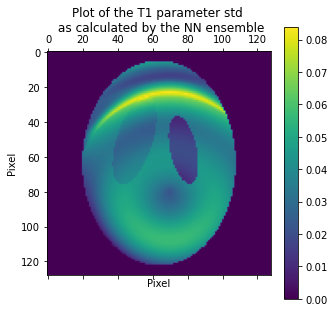

evaluating ensemble mean and variance
 GOOD 


In [24]:
try:
    config_tmp = deepcopy(config)

    evalwasabi = EvalWasabi(config_tmp,
                            data_type='phantom', 
                            phantom_filepath='data/test_phantom_wasabi_2020-11-23.p', 
                            create_zeros_tgts=True,
                            net_to_load=['output/tests/test_config_ens_1.pt', 
                                         'output/tests/test_config_ens_2.pt', 
                                         'output/tests/test_config_ens_3.pt'])
    evalwasabi.predict()
    evalwasabi.parameter_min_max_check(print_param=False)
    ens = evalwasabi.get_predictions(ens=True)
    non_ens = evalwasabi.get_predictions()

    # check that predictions are the same
    assert t.isclose(ens[:,:4].mean(), non_ens[:,:4].mean(), atol=0.00001)
    # check that uncertainties are different
    assert ens[:,4:].mean() != non_ens[:,4:].mean()

    # check plotting with ensemble
    evalwasabi.plot_parameter(param='T1', uncertainty=True, ens=True)

    # check numeric correct calculation
    evalwasabi.trainer[0].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.
    evalwasabi.trainer[1].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 2.
    evalwasabi.trainer[2].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 3.

    ens = evalwasabi.get_predictions(ens=True)
    non_ens = evalwasabi.get_predictions()

    # check ensemble mean and variance calculation
    assert ens[0,0] == 2 
    assert ens[-1,-1] == 1
    # check non ensemble mean and mean of uncertainies calculation
    assert non_ens[0,0] == 2
    assert non_ens[-1,-1] == 2
    
    del evalwasabi, ens, non_ens
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

# Test ensemble uncertainties

100%|########################################| 126/126 [00:00<00:00, 527.44it/s]


evaluating ensemble mean and variance
evaluating ensemble mean and variance


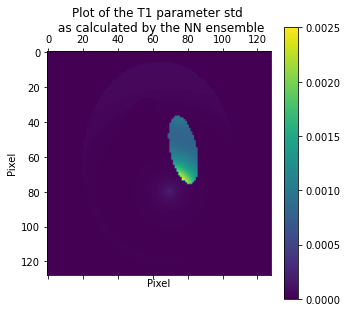

evaluating ensemble mean and variance
evaluating ensemble mean and variance


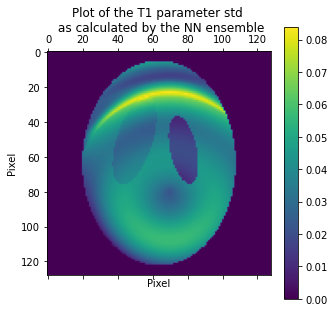

evaluating ensemble mean and variance
evaluating ensemble mean and variance


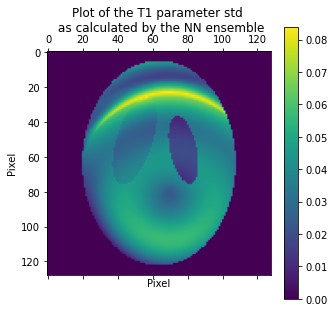

evaluating ensemble mean and variance
evaluating ensemble mean and variance
evaluating ensemble mean and variance
 GOOD 


In [5]:
try:
    config_tmp = deepcopy(config)

    evalwasabi = EvalWasabi(config_tmp,
                            data_type='phantom', 
                            phantom_filepath='data/test_phantom_wasabi_2020-11-23.p', 
                            create_zeros_tgts=True,
                            net_to_load=['output/tests/test_config_ens_1.pt', 
                                         'output/tests/test_config_ens_2.pt', 
                                         'output/tests/test_config_ens_3.pt'])
    evalwasabi.predict()

    # check plotting with ensemble
    evalwasabi.plot_parameter(param='T1', uncertainty=True, ens=True, uncer_type='aleatoric')
    evalwasabi.plot_parameter(param='T1', uncertainty=True, ens=True, uncer_type='epistemic')
    evalwasabi.plot_parameter(param='T1', uncertainty=True, ens=True, uncer_type='combined')



    # check numeric correct calculation ALEATORIC
    evalwasabi.trainer[0].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.
    evalwasabi.trainer[1].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.
    evalwasabi.trainer[2].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.

    ens = evalwasabi.get_predictions(ens=True, uncer_type='aleatoric')
    non_ens = evalwasabi.get_predictions()
    
    # check ensemble mean and variance calculation
    assert ens[0,0] == 1
    assert ens[-1,-1] == 1
    # check non ensemble mean and mean of uncertainies calculation
    assert non_ens[0,0] == 1
    assert non_ens[-1,-1] == 1
    
    
    # check numeric correct calculation EPISTEMIC
    evalwasabi.trainer[0].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.
    evalwasabi.trainer[1].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.
    evalwasabi.trainer[2].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.

    ens = evalwasabi.get_predictions(ens=True, uncer_type='epistemic')
    non_ens = evalwasabi.get_predictions()
    
    # check ensemble mean and variance calculation
    assert ens[0,0] == 1
    assert ens[-1,-1] == 0
    # check non ensemble mean and mean of uncertainies calculation
    assert non_ens[0,0] == 1
    assert non_ens[-1,-1] == 1
    
    
    # check numeric correct calculation COMBINED
    evalwasabi.trainer[0].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.
    evalwasabi.trainer[1].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.
    evalwasabi.trainer[2].predictions = t.zeros([5, 8], dtype=float).to('cuda:0') + 1.

    ens = evalwasabi.get_predictions(ens=True, uncer_type='combined')
    non_ens = evalwasabi.get_predictions()
    
    # check ensemble mean and variance calculation
    assert ens[0,0] == 1
    assert ens[-1,-1] == 1
    # check non ensemble mean and mean of uncertainies calculation
    assert non_ens[0,0] == 1
    assert non_ens[-1,-1] == 1
    
    del evalwasabi, ens, non_ens
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

# test physical model functionality

In [25]:
try:
    config_tmp = deepcopy(config)
    config_tmp['FORCE_CPUGPU'] = 'gpu'
    config_tmp['DATA_Y_PATH'] = "/home/henrik/work/python/WASABInet/data/testdata/20210720_20210706_WASABITI_sweep12_sim/20210720_y_20210706_WASABITI_sweep12_sim.pt"
    config_tmp['DATA_X_PATH'] = "/home/henrik/work/python/WASABInet/data/testdata/20210720_20210706_WASABITI_sweep12_sim/20210720_X_20210706_WASABITI_sweep12_sim.pt"
    config_tmp['LAYERS'] += ['softplus']
    config_tmp['TYPE_PARAMS'] = ['dB0','B1','T1']
    config_tmp['NORM_TGTS'] = True
    config_tmp['BATCH_SIZE'] = {1: 128, 15:256}
    config_tmp['N_NEURONS'] = [31, 100, 100, 6]
    config_tmp['LOSS_FKT'] = 'GNLLonSigma'
    config_tmp['LOSS_FKT'] = {'FCT': 'GNLLonSigma_PhysM',
    'kwargs':{
    'x':[
      -2., -1.86666667, -1.73333333, -1.6, -1.46666667, -1.33333333, -1.2, -1.06666667, 
        -0.933333333, -0.8, -0.666666667, -0.533333333, -0.4, -0.266666667, -0.133333333, 
        0., 0.133333333, 0.266666667, 0.4, 0.533333333, 0.666666667, 0.8, 0.933333333, 1.06666667, 
        1.2, 1.33333333, 1.46666667, 1.6, 1.73333333,1.86666667, 2.],
    'trec':[
    0.5, 1, 1.5, 2, 2.5, 3, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 3, 2.5, 2, 1.5, 1, 0.5],
    'lambda_fact': 3., 't2': 75e-3}}
    data = Data()
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data, use_tb=True)
    trainer.train(1)
    
    del data, trainer
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

100%|#################| 10/10 [00:20<00:00,  2.02s/it, adding noise =gamma type]
100%|#| 1/1 [00:48<00:00, 48.88s/it, sum loss=-1.62, val sum loss=-2.14, epoch=1

 GOOD 


In [26]:
try:
    config_tmp = deepcopy(config)
    config_tmp['FORCE_CPUGPU'] = 'gpu'
    config_tmp['DATA_Y_PATH'] = "/home/henrik/work/python/WASABInet/data/testdata/20210720_20210706_WASABITI_sweep12_sim/20210720_y_20210706_WASABITI_sweep12_sim.pt"
    config_tmp['DATA_X_PATH'] = "/home/henrik/work/python/WASABInet/data/testdata/20210720_20210706_WASABITI_sweep12_sim/20210720_X_20210706_WASABITI_sweep12_sim.pt"
    config_tmp['LAYERS'] += ['softplus']
    config_tmp['TYPE_PARAMS'] = ['dB0','B1','T1']
    config_tmp['NORM_TGTS'] = True
    config_tmp['BATCH_SIZE'] = {1: 128, 15:256}
    config_tmp['N_NEURONS'] = [31, 100, 100, 6]
    config_tmp['LOSS_FKT'] = 'GNLLonSigma'
    config_tmp['LOSS_FKT'] = {'FCT': 'GNLLonSigma_PhysM_alt',
    'kwargs':{
    'x':[
      -2., -1.86666667, -1.73333333, -1.6, -1.46666667, -1.33333333, -1.2, -1.06666667, 
        -0.933333333, -0.8, -0.666666667, -0.533333333, -0.4, -0.266666667, -0.133333333, 
        0., 0.133333333, 0.266666667, 0.4, 0.533333333, 0.666666667, 0.8, 0.933333333, 1.06666667, 
        1.2, 1.33333333, 1.46666667, 1.6, 1.73333333,1.86666667, 2.],
    'trec':[
    0.5, 1, 1.5, 2, 2.5, 3, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 3, 2.5, 2, 1.5, 1, 0.5],
    'lambda_fact': 3., 't2': 75e-3}}
    data = Data()
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data, use_tb=True)
    trainer.train(1)
    
    del data, trainer
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

100%|#################| 10/10 [00:18<00:00,  1.84s/it, adding noise =gamma type]
100%|#| 1/1 [00:51<00:00, 51.76s/it, sum loss=-1.57, val sum loss=-2.11, epoch=1

 GOOD 


# test PhysM_alt

In [27]:
config_tmp = deepcopy(config)
config_tmp['FORCE_CPUGPU'] = 'gpu'
config_tmp['DATA_Y_PATH'] = "data/testdata/20211119_WASABITI_sweep12_analytical_testdata/20211119_y_WASABITI_sweep12_analytical_testdata.pt"
config_tmp['DATA_X_PATH'] = "data/testdata/20211119_WASABITI_sweep12_analytical_testdata/20211119_X_WASABITI_sweep12_analytical_testdata.pt"
config_tmp['LAYERS'] += ['softplus']
config_tmp['TYPE_PARAMS'] = ['dB0','B1','T1', 'T2']
config_tmp['NORM_TGTS'] = True
config_tmp['BATCH_SIZE'] = {1: 128, 15:256}
config_tmp['N_NEURONS'] = [31, 100, 100, 8]
config_tmp['LOSS_FKT'] = 'GNLLonSigma'
config_tmp['LOSS_FKT'] = {'FCT': 'GNLLonSigma_PhysM_alt',
'kwargs':{
'x':[
  -2., -1.86666667, -1.73333333, -1.6, -1.46666667, -1.33333333, -1.2, -1.06666667, 
    -0.933333333, -0.8, -0.666666667, -0.533333333, -0.4, -0.266666667, -0.133333333, 
    0., 0.133333333, 0.266666667, 0.4, 0.533333333, 0.666666667, 0.8, 0.933333333, 1.06666667, 
    1.2, 1.33333333, 1.46666667, 1.6, 1.73333333,1.86666667, 2.],
'trec':[
0.5, 1, 1.5, 2, 2.5, 3, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 
    1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 3, 2.5, 2, 1.5, 1, 0.5],
'lambda_fact': 3., 't2': 75e-3}}


data = Data()
data.load_data_tensor(config_tmp, printing=False)
trainer = Trainer(data, use_tb=True)

100%|#################| 10/10 [00:19<00:00,  1.96s/it, adding noise =gamma type]


In [29]:
# get prediction
input_x, input_y, input_x_no_noise, _ = next(iter(trainer.test_loader))
output = trainer.net(input_x)
gnll_loss, phys_m_loss = trainer.crit(output, input_y, input_x_no_noise, trainer.data)

In [31]:
# get prediction
input_x, input_y, input_x_no_noise, _ = next(iter(trainer.test_loader))
output = trainer.net(input_x)

# change 4 params to OG values
output_modded = output.clone()
output_modded[:,:4] = input_y[:]

##  if small uncerts mean small GNLL loss
# magnitude of uncerts
for i in range(0, 15):
    uncert = t.rand([128,4], dtype=t.float32) * 10**(5-i)
    output_modded[:,4:] = uncert[:]

    # calc phys_m_loss
    gnll_loss, phys_m_loss = trainer.crit(output_modded, input_y, input_x_no_noise, trainer.data)
    
    print(i , 'phys_loss', phys_m_loss.cpu().detach().numpy(), 'gnll_loss', gnll_loss.mean().cpu().detach().numpy())
    
print('')

## if correct params mean small loss
# magnitude of true values
for i in range(0, 15):
    output_modded[:,:4] = input_y[:,:4] * 2**(i)

    # calc phys_m_loss
    gnll_loss, phys_m_loss = trainer.crit(output_modded, input_y, input_x_no_noise, trainer.data)
    
    print(i , 'phys_loss', phys_m_loss.cpu().detach().numpy(), 'gnll_loss', gnll_loss.mean().cpu().detach().numpy())

0 phys_loss 1.9801718e-14 gnll_loss 46.00116
1 phys_loss 1.9801718e-14 gnll_loss 36.47262
2 phys_loss 1.9801718e-14 gnll_loss 27.234343
3 phys_loss 1.9801718e-14 gnll_loss 18.111065
4 phys_loss 1.9801718e-14 gnll_loss 8.8635845
5 phys_loss 1.9801718e-14 gnll_loss -0.6201142
6 phys_loss 1.9801718e-14 gnll_loss -9.354542
7 phys_loss 1.9801718e-14 gnll_loss -18.818222
8 phys_loss 1.9801718e-14 gnll_loss -27.883133
9 phys_loss 1.9801718e-14 gnll_loss -37.008858
10 phys_loss 1.9801718e-14 gnll_loss -46.359642
11 phys_loss 1.9801718e-14 gnll_loss -55.691444
12 phys_loss 1.9801718e-14 gnll_loss -64.96227
13 phys_loss 1.9801718e-14 gnll_loss -73.847595
14 phys_loss 1.9801718e-14 gnll_loss -83.18143

0 phys_loss 1.9801718e-14 gnll_loss -83.18143
1 phys_loss 0.06519935 gnll_loss 2.3772307e+20
2 phys_loss 0.09829814 gnll_loss 2.1395078e+21
3 phys_loss 0.12584554 gnll_loss 1.1648431e+22
4 phys_loss 0.15036705 gnll_loss 5.3487686e+22
5 phys_loss 0.16661176 gnll_loss 2.284519e+23
6 phys_loss 0.17536

In [4]:
config_tmp = deepcopy(config)
config_tmp['FORCE_CPUGPU'] = 'gpu'
config_tmp['DATA_Y_PATH'] = "data/testdata/20211119_WASABITI_sweep12_analytical_testdata/20211119_y_WASABITI_sweep12_analytical_testdata.pt"
config_tmp['DATA_X_PATH'] = "data/testdata/20211119_WASABITI_sweep12_analytical_testdata/20211119_X_WASABITI_sweep12_analytical_testdata.pt"
config_tmp['LAYERS'] += ['softplus']
config_tmp['TYPE_PARAMS'] = ['dB0','B1','T1', 'T2']
config_tmp['NORM_TGTS'] = True
config_tmp['BATCH_SIZE'] = {1: 128, 15:256}
config_tmp['N_NEURONS'] = [31, 100, 100, 8]
config_tmp['LOSS_FKT'] = 'GNLLonSigma'
config_tmp['LOSS_FKT'] = {'FCT': 'GNLLonSigma_PhysM_alt_useTgts',
'kwargs':{
'x':[
  -2., -1.86666667, -1.73333333, -1.6, -1.46666667, -1.33333333, -1.2, -1.06666667, 
    -0.933333333, -0.8, -0.666666667, -0.533333333, -0.4, -0.266666667, -0.133333333, 
    0., 0.133333333, 0.266666667, 0.4, 0.533333333, 0.666666667, 0.8, 0.933333333, 1.06666667, 
    1.2, 1.33333333, 1.46666667, 1.6, 1.73333333,1.86666667, 2.],
'trec':[
0.5, 1, 1.5, 2, 2.5, 3, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 
    1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 3, 2.5, 2, 1.5, 1, 0.5],
'lambda_fact': 3.}}


data = Data()
data.load_data_tensor(config_tmp, printing=False)
trainer = Trainer(data, use_tb=False)
trainer.train(5)

100%|#################| 10/10 [00:16<00:00,  1.65s/it, adding noise =gamma type]
100%|#| 5/5 [04:00<00:00, 48.10s/it, sum loss=-3.26, val sum loss=-3.34, epoch=5


In [5]:
# get prediction
input_x, input_y, input_x_no_noise, y_no_noise_useTgts = next(iter(trainer.test_loader))
output = trainer.net(input_x)
gnll_loss, phys_m_loss = trainer.crit(output, input_y, input_x_no_noise, y_no_noise_useTgts, trainer.data)

In [6]:
phys_m_loss

tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>)

In [11]:
gnll_loss

tensor([ -7.2489,  -0.7479,  -4.6581,  -4.5466,   0.6147,  -3.8587,  -1.5144,
         -5.3237,  -4.5706,  -4.6704,  -9.8966,  -4.5133,  -7.7170,  -2.2323,
         -1.6680,  -0.3119,  -0.5100,  -9.0092,  -5.2129,   1.1859,  -2.7596,
         -3.1211,  -1.5747,  -4.1210,  -5.1978,  -1.5036,  -1.5457,  -2.3256,
         -6.9276,  -3.4864,  -2.6599,  -4.3812,  -3.5229,  -4.1245,  -4.9532,
         -3.9146,  -4.1460,  -1.8325,  -1.7718,  -2.8102,  -6.1922,  -9.8017,
         -0.5916,  -0.3888,  -2.4644,  -9.8138,  -3.5989,  -1.8714,  -0.9033,
         -4.7491,  -6.7295,  -4.2450,  -6.6143,  -8.1793,  -2.8076,  -9.0256,
         -5.1738,  -6.1014,   3.2398,  -3.9345,  -6.2883,  -4.6348,  -7.7175,
         -6.1648,   0.6447,  -2.8399,  -5.2579,   0.3027,  -2.5418,  -1.8074,
         -0.9646,   0.4956,  -5.8625,  -5.4853,  -2.2713,   5.8330,  -1.6978,
         -2.4780,  -4.9399,  -1.8994,  -6.2542, -10.0076,  -6.2663,  -0.4265,
         -3.7258,  -5.2831,  -4.2334,  -4.0228,  -4.2760,  -3.70

In [7]:
print((trainer.data.y_no_noise_all_val[:,0].max()))
print((trainer.data.y_no_noise_all_val[:,1].max()))
print((trainer.data.y_no_noise_all_val[:,2].max()))
print((trainer.data.y_no_noise_all_val[:,3].max()))

tensor(0.9999, device='cuda:0')
tensor(2.0000, device='cuda:0')
tensor(6.9995, device='cuda:0')
tensor(4.9972, device='cuda:0')


In [8]:
trainer.predictions[:,:4]

tensor([[ 0.0853,  0.9639,  1.4135,  1.3219],
        [ 0.1564,  1.5478,  1.9313,  1.2336],
        [-0.0119,  1.0324,  4.0807,  1.4247],
        ...,
        [-0.1350,  1.2151,  2.2279,  1.3419],
        [ 0.3845,  1.3728,  0.7788,  1.5231],
        [-0.1003,  1.4248,  2.7770,  1.2832]], device='cuda:0')

In [9]:
trainer.predictions_targets

tensor([[ 0.7214,  0.5757,  1.6808,  3.0133],
        [ 0.0892,  1.4726,  0.8818,  0.0783],
        [-0.5565,  0.8234,  4.5491,  3.2219],
        ...,
        [-0.3293,  1.1963,  2.1750,  0.1464],
        [ 0.5263,  1.3016,  0.8564,  0.8119],
        [-0.2115,  1.3613,  2.1964,  0.2691]], device='cuda:0')

In [16]:
y_no_noise_useTgts[:,3].max()

tensor(4.4787, device='cuda:0')

In [12]:
# get prediction
input_x, input_y, input_x_no_noise, y_no_noise_useTgts = next(iter(trainer.test_loader))
output = trainer.net(input_x)

# change 4 params to OG values
output_modded = output.clone()
output_modded[:,:4] = input_y[:]

##  if small uncerts mean small GNLL loss
# magnitude of uncerts
for i in range(0, 15):
    uncert = t.rand([128,4], dtype=t.float32) * 10**(5-i)
    output_modded[:,4:] = uncert[:]

    # calc phys_m_loss
    gnll_loss, phys_m_loss = trainer.crit(output_modded, input_y, input_x_no_noise, y_no_noise_useTgts, trainer.data)
    
    print(i , 'phys_loss', phys_m_loss.cpu().detach().numpy(), 'gnll_loss', gnll_loss.mean().cpu().detach().numpy())
    
print('')

## if correct params mean small loss
# magnitude of true values
for i in range(0, 15):
    output_modded[:,:4] = input_y[:,:4] * 2**(i)

    # calc phys_m_loss
    gnll_loss, phys_m_loss = trainer.crit(output_modded, input_y, input_x_no_noise, y_no_noise_useTgts, trainer.data)
    
    print(i , 'phys_loss', phys_m_loss.cpu().detach().numpy(), 'gnll_loss', gnll_loss.mean().cpu().detach().numpy())

0 phys_loss 1.8245933e-14 gnll_loss 45.563503
1 phys_loss 1.8245933e-14 gnll_loss 36.351574
2 phys_loss 1.8245933e-14 gnll_loss 27.274734
3 phys_loss 1.8245933e-14 gnll_loss 18.2513
4 phys_loss 1.8245933e-14 gnll_loss 9.054886
5 phys_loss 1.8245933e-14 gnll_loss -0.2631621
6 phys_loss 1.8245933e-14 gnll_loss -9.493809
7 phys_loss 1.8245933e-14 gnll_loss -19.022945
8 phys_loss 1.8245933e-14 gnll_loss -27.744408
9 phys_loss 1.8245933e-14 gnll_loss -37.17031
10 phys_loss 1.8245933e-14 gnll_loss -46.61389
11 phys_loss 1.8245933e-14 gnll_loss -55.536736
12 phys_loss 1.8245933e-14 gnll_loss -65.10019
13 phys_loss 1.8245933e-14 gnll_loss -73.88073
14 phys_loss 1.8245933e-14 gnll_loss -83.271194

0 phys_loss 1.8245933e-14 gnll_loss -83.271194
1 phys_loss 0.06341869 gnll_loss 1.4538161e+21
2 phys_loss 0.09564106 gnll_loss 1.3084344e+22
3 phys_loss 0.124404736 gnll_loss 7.1236984e+22
4 phys_loss 0.14714281 gnll_loss 3.2710865e+23
5 phys_loss 0.16160963 gnll_loss 1.3971173e+24
6 phys_loss 0.17009

In [ ]:
input_y[:4]

In [4]:
# loading optimizer

config_tmp = deepcopy(config)
config_tmp['FORCE_CPUGPU'] = 'gpu'
config_tmp['DATA_Y_PATH'] = "data/testdata/20211119_WASABITI_sweep12_analytical_testdata/20211119_y_WASABITI_sweep12_analytical_testdata.pt"
config_tmp['DATA_X_PATH'] = "data/testdata/20211119_WASABITI_sweep12_analytical_testdata/20211119_X_WASABITI_sweep12_analytical_testdata.pt"
config_tmp['LAYERS'] += ['softplus']
config_tmp['TYPE_PARAMS'] = ['dB0','B1','T1', 'T2']
config_tmp['NORM_TGTS'] = True
config_tmp['NOISE'] = False
config_tmp['BATCH_SIZE'] = {1: 128, 15:256}
config_tmp['N_NEURONS'] = [31, 100, 100, 8]
config_tmp['LOSS_FKT'] = 'GNLLonSigma'
config_tmp['LOSS_FKT'] = {'FCT': 'GNLLonSigma_PhysM_alt_useTgts',
'kwargs':{
'x':[
  -2., -1.86666667, -1.73333333, -1.6, -1.46666667, -1.33333333, -1.2, -1.06666667, 
    -0.933333333, -0.8, -0.666666667, -0.533333333, -0.4, -0.266666667, -0.133333333, 
    0., 0.133333333, 0.266666667, 0.4, 0.533333333, 0.666666667, 0.8, 0.933333333, 1.06666667, 
    1.2, 1.33333333, 1.46666667, 1.6, 1.73333333,1.86666667, 2.],
'trec':[
0.5, 1, 1.5, 2, 2.5, 3, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 
    1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 3, 2.5, 2, 1.5, 1, 0.5],
'lambda_fact': 3.}}


data = Data()
data.load_data_tensor(config_tmp, printing=False)
trainer = Trainer(data, use_tb=False)

In [5]:
trainer.train(2)

100%|####| 2/2 [00:10<00:00,  5.06s/it, sum loss=-1, val sum loss=-1.3, epoch=2]


In [6]:
config_tmp['OPTIMIZER'] = {3: 'Adam', '3_kwargs':{'lr':0.000001}}

data = Data()
data.load_data_tensor(config_tmp, printing=False)
trainer = Trainer(data, use_tb=False)
trainer.config
print(trainer.opt)

None


In [7]:
trainer.load_net(str('output/tests/test_config_model_autosave.pt'))
print(trainer.opt)

Warning! Be aware that the two config files are different!
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)


In [8]:
trainer.train(1)

100%|#| 1/1 [00:05<00:00,  5.19s/it, sum loss=-1.33, val sum loss=-1.38, epoch=3


In [9]:
trainer.opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 1e-06
    weight_decay: 0
)

In [12]:
trainer.config['OPTIMIZER'].get(3)

'Adam'

In [17]:
t.load('output/tests/test_config_model_autosave.pt')['config'].get('OPTIMIZER')

{3: 'Adam', '3_kwargs': {'lr': 1e-06}}

# test Monte-Carlo Dropout

In [ ]:
try:
    config_tmp = deepcopy(config)
    config_tmp['LOSS_FKT'] = 'MSELoss'
    config_tmp['LAYERS'] = ['linear', 'elu', 'dropout', 'linear', 'elu', 'linear']
    config_tmp['LAYER_KWARGS'] = {0: {'bias': True}, 3: {'bias': True}, 5: {'bias': True}}
    config_tmp['N_NEURONS'][-1] = 4
    config_tmp['MONTECARLODROPOUT'] = True
    data = Data()
    data.load_data_tensor(config_tmp, printing=False)
    trainer = Trainer(data)
    trainer.train(2)

    # first prediction
    evalwasabi = EvalWasabi(trainer, data_type='BMCTool')
    evalwasabi.predict()
    var1 = evalwasabi.trainer[0].predictions.clone().detach()

    # second prdiction
    evalwasabi.predict()
    var2 = evalwasabi.trainer[0].predictions.clone().detach()

    # comparison has to be different
    assert not np.all(var1.numpy()==var2.numpy())
    
    
    del data, trainer, config_tmp, var1, var2, evalwasabi
    
    print("\033[0;30;42m GOOD \033[0m")
except:
    traceback.print_exc()
    print("\033[0;30;41m ERROR \033[0m")

In [ ]:
assert 1==2 # interrupt

# Still unfinished

In [ ]:
loaded_model = load('output/tests/test_config_model_autosave.pt')
loaded_model.keys()

In [ ]:
loaded_model['time_trained']

In [ ]:
data2 = Data()
data2.load_data_tensor(config)
trainer2 = Trainer(data2)
trainer2.load_net('output/tests/test_config_model_autosave.pt')
trainer2.train(1)

In [ ]:
evalwasabi = EvalWasabi('output/tests/test_config_model_autosave.pt', 'BMCTool')

In [ ]:
print(evalwasabi.predict(show_test_set_loss=True, ret=True))
evalwasabi.parameter_min_max_check()

In [ ]:
evalwasabi.trainer.epochCount

In [ ]:
predictions = []
for i in range(31):
    x = t.zeros((1,31), dtype=t.float)
    x[0,i] += 1
    y = t.zeros((1,4), dtype=t.float)
    evalwasabi2 = EvalWasabi('output/tests/test_config_model_autosave.pt', 'BMCTool',
                             x_file=x,
                             y_file=y)
                             #create_zeros_tgts=True)
    evalwasabi2.predict()
    predictions += [evalwasabi2.trainer.predictions]

In [ ]:
normed = [predictions[i][0][:4].norm() for i in range(len(predictions))]

for i in range(len(predictions)):
    print('{:.2e}  {:.1e} {:.1e} {:.1e} {:.1e} {:.1e} {:.1e} {:.1e} {:.1e}'.format(normed[i],
                                                                           predictions[i][0][0],
                                                                           predictions[i][0][1],
                                                                           predictions[i][0][2],
                                                                           predictions[i][0][3],
                                                                           predictions[i][0][4],
                                                                           predictions[i][0][5],
                                                                           predictions[i][0][6],
                                                                           predictions[i][0][7]))

In [ ]:

tmp_filepath = os.path.join(config['OUTPUT_DIR'], config['CONFIG_NAME'])
type(glob.glob(tmp_filepath + '_best_model_save.pt'))